In [8]:
import numpy as np
%matplotlib inline

In [5]:
from scipy import stats
def measure(n):
    "Measurement model, return two coupled measurements."
    m1 = np.random.normal(size=n)
    m2 = np.random.normal(scale=0.5, size=n)
    return m1+m2, m1-m2

In [6]:
m1, m2 = measure(2000)
xmin = m1.min()
xmax = m1.max()
ymin = m2.min()
ymax = m2.max()

In [21]:
X, Y = np.mgrid[xmin:xmax:10j, ymin:ymax:10j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([m1, m2])
kernel = stats.gaussian_kde(values)
Z = np.reshape(kernel(positions).T, X.shape)


In [26]:
values.shape

(2, 2000)

In [29]:
kernel.dataset==values

4000

In [22]:
Z

array([[  1.92546140e-04,   1.18382606e-03,   1.73394874e-03,
          4.91880820e-04,   3.98832243e-04,   1.43472358e-06,
          1.54488661e-12,   5.70181738e-21,   2.44256630e-33,
          6.89101500e-50],
       [  3.49025665e-04,   4.79149963e-03,   1.07631476e-02,
          8.52985871e-03,   5.41908435e-03,   9.99764009e-04,
          1.08695912e-05,   6.29616218e-11,   3.44429614e-20,
          7.74495336e-34],
       [  2.82656794e-03,   8.86417187e-03,   2.55036378e-02,
          4.74789312e-02,   2.54763181e-02,   9.27232795e-03,
          3.12976944e-03,   1.56775077e-05,   7.83661003e-12,
          3.56132629e-21],
       [  1.80316608e-03,   8.08821944e-03,   3.16565147e-02,
          8.12748268e-02,   1.04275492e-01,   5.06477836e-02,
          1.10444503e-02,   1.34978417e-03,   6.24638942e-06,
          2.76330900e-11],
       [  2.99404780e-05,   4.03620133e-03,   2.10882571e-02,
          7.97159322e-02,   1.54172650e-01,   1.22099494e-01,
          4.15627452e-02

In [ ]:


import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,           extent=[xmin, xmax, ymin, ymax])
# ax.plot(m1, m2, 'k.', markersize=2)
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
plt.show()

# try sklearn

In [13]:
from sklearn.neighbors import KernelDensity
def kde_sklearn(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
    return np.exp(log_pdf)

In [16]:
%matplotlib inline

In [18]:
from scipy.stats.distributions import norm

# The grid we'll use for plotting
x_grid = np.linspace(-4.5, 3.5, 1000)

# Draw points from a bimodal distribution in 1D
np.random.seed(0)
x = np.concatenate([norm(-1, 1.).rvs(400),
                    norm(1, 0.3).rvs(100)])
pdf_true = (0.8 * norm(-1, 1).pdf(x_grid) +
            0.2 * norm(1, 0.3).pdf(x_grid))

In [41]:
x[:, np.newaxis]

array([[ 0.76405235],
       [-0.59984279],
       [-0.02126202],
       [ 1.2408932 ],
       [ 0.86755799],
       [-1.97727788],
       [-0.04991158],
       [-1.15135721],
       [-1.10321885],
       [-0.5894015 ],
       [-0.85595643],
       [ 0.45427351],
       [-0.23896227],
       [-0.87832498],
       [-0.55613677],
       [-0.66632567],
       [ 0.49407907],
       [-1.20515826],
       [-0.6869323 ],
       [-1.85409574],
       [-3.55298982],
       [-0.3463814 ],
       [-0.1355638 ],
       [-1.74216502],
       [ 1.26975462],
       [-2.45436567],
       [-0.95424148],
       [-1.18718385],
       [ 0.53277921],
       [ 0.46935877],
       [-0.84505257],
       [-0.62183748],
       [-1.88778575],
       [-2.98079647],
       [-1.34791215],
       [-0.84365103],
       [ 0.23029068],
       [ 0.20237985],
       [-1.38732682],
       [-1.30230275],
       [-2.04855297],
       [-2.42001794],
       [-2.70627019],
       [ 0.9507754 ],
       [-1.50965218],
       [-1

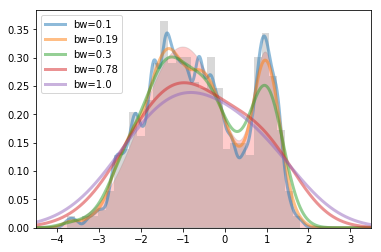

In [31]:
fig, ax = plt.subplots()
ax.fill(x_grid, pdf_true, ec='gray', fc='red', alpha=0.2)
for bandwidth in [0.1, 0.19, 0.3, 0.78,1.0]:
    ax.plot(x_grid, kde_sklearn(x, x_grid, bandwidth=bandwidth),
            label='bw={0}'.format(bandwidth), linewidth=3, alpha=0.5)
ax.hist(x, 30, fc='gray', histtype='stepfilled', alpha=0.3, normed=True)
ax.set_xlim(-4.5, 3.5)
ax.legend(loc='upper left')

{'bandwidth': 0.47241379310344822}


/home/jwu/miniconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:672: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,


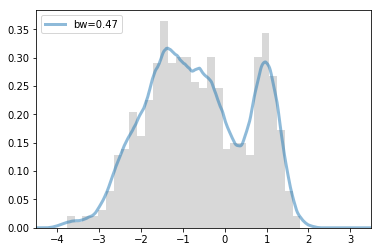

In [37]:
from sklearn.model_selection  import GridSearchCV
grid = GridSearchCV(KernelDensity(kernel='linear'),
                    {'bandwidth': np.linspace(0.1, 1.0, 30)},
                    cv=10) # 20-fold cross-validation
grid.fit(x[:, None])
print (grid.best_params_)

kde = grid.best_estimator_
pdf = np.exp(kde.score_samples(x_grid[:, None]))

fig, ax = plt.subplots()
ax.plot(x_grid, pdf, linewidth=3, alpha=0.5, label='bw=%.2f' % kde.bandwidth)
ax.hist(x, 30, fc='gray', histtype='stepfilled', alpha=0.3, normed=True)
ax.legend(loc='upper left')
ax.set_xlim(-4.5, 3.5);

{'bandwidth': 0.37931034482758619, 'kernel': 'tophat'}


/home/jwu/miniconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:672: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,


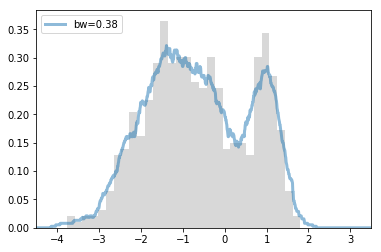

In [39]:
from sklearn.model_selection  import GridSearchCV
grid = GridSearchCV(KernelDensity(),
                    {'bandwidth': np.linspace(0.1, 1.0, 30), 'kernel': ['tophat', 'linear', 'exponential', 'gaussian']},
                    cv=10) # 20-fold cross-validation
grid.fit(x[:, None])
print (grid.best_params_)

kde = grid.best_estimator_
pdf = np.exp(kde.score_samples(x_grid[:, None]))

fig, ax = plt.subplots()
ax.plot(x_grid, pdf, linewidth=3, alpha=0.5, label='bw=%.2f' % kde.bandwidth)
ax.hist(x, 30, fc='gray', histtype='stepfilled', alpha=0.3, normed=True)
ax.legend(loc='upper left')
ax.set_xlim(-4.5, 3.5);